# Predict Students Dropout - Get Raw Data

##### Predict_Students_Dropout_Get_Raw_Data_01.ipynb


This notebook is responsible for acquiring the raw data for the "Predict Students' Dropout and Academic Success" project. The data is fetched from an external source, inspected for initial understanding, and saved in a local CSV file for further processing.

## Steps
1. **Load the Data**: Fetch the dataset from the website (archive.ics.uci.edu).
2. **Initial Inspection**: Display the first few rows and the data summary to understand its structure and contents.
3. **Save Raw Data**: Store the raw data in a CSV file in data folder for future use in other notebooks.

In [1]:
# The '!' allows us to run shell commands in the notebook
# command installs the Python packages listed in the requirements.txt file
#!pip install -r requirements.txt

In [2]:
#Import required packages

from ucimlrepo import fetch_ucirepo

import os
import pandas as pd
import pprint

In [3]:
# Fetch dataset from source ucirepo with id=697
try:
    predict_students_dropout = fetch_ucirepo(id=697)
    print("Dataset fetched successfully.")
except Exception as e:
    print(f"Error fetching dataset: {e}")
    raise

# Data (as pandas dataframes)
try:
    X = predict_students_dropout.data.features
    y = predict_students_dropout.data.targets
    print("Data extracted successfully.")
except Exception as e:
    print(f"Error extracting data: {e}")
    raise


Dataset fetched successfully.
Data extracted successfully.


In [4]:
# Display information about DataFrame X
X.info()  # Provides summary of DataFrame X (columns, non-null values, data types, memory usage)

# Display information about Series or DataFrame y
y.info()  # Provides summary of y (columns, non-null values, data types, memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
#Pretty print metadata
metadata = predict_students_dropout.metadata

pprint.pp(metadata)

{'uci_id': 697,
 'name': "Predict Students' Dropout and Academic Success",
 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success',
 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv',
 'abstract': 'A dataset created from a higher education institution (acquired '
             'from several disjoint databases) related to students enrolled in '
             'different undergraduate degrees, such as agronomy, design, '
             'education, nursing, journalism, management, social service, and '
             'technologies.\n'
             'The dataset includes information known at the time of student '
             'enrollment (academic path, demographics, and social-economic '
             "factors) and the students' academic performance at the end of "
             'the first and second semesters. \n'
             'The data is used to build classification models to predict '
             "students' dropout and acade

In [6]:
# Assuming 'variables' is your DataFrame containing the metadata
# Filter the DataFrame where demographic is not None
demographic_variables = variables[variables['demographic'].notna()]

# Display the first 10 rows of the filtered DataFrame
display(demographic_variables.head(1))


NameError: name 'variables' is not defined

In [ ]:
# Filter columns with 10 or fewer unique values in the demographic column
columns_with_few_unique_values = demographic_variables[
    demographic_variables['demographic'].apply(lambda x: len(str(x).split())) <= 10
]

# Display the filtered DataFrame
display(columns_with_few_unique_values.head(1))


,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated,None,no


In [ ]:
# Variable information
variables = predict_students_dropout.variables

#display(variables.description)

# Adjust display option for pandas
pd.set_option('display.max_colwidth', None)

display(variables.head(1))

#display(variables.description.head(5))

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated,None,no


In [ ]:
# Combine features and target into a single DataFrame
try:
    df = pd.concat([X, y], axis=1)
    print("Features and target combined successfully.")
except Exception as e:
    print(f"Error combining features and target: {e}")
    raise

# Ensure ./data directory exists
try:
    os.makedirs('data', exist_ok=True)
    print("./data directory exists or created successfully.")
except Exception as e:
    print(f"Error creating directory: {e}")
    raise

# Save combined DataFrame to CSV
try:
    df.to_csv('data/row_data.csv', index=False)
    print("Combined data saved successfully.")
except Exception as e:
    print(f"Error saving combined data to CSV: {e}")
    raise

# Read the CSV back into a DataFrame
try:
    df_from_csv = pd.read_csv('data/row_data.csv')
    print("Data loaded successfully from CSV.")
except Exception as e:
    print(f"Error reading CSV into DataFrame: {e}")
    raise

Features and target combined successfully.
./data directory exists or created successfully.
Combined data saved successfully.
Data loaded successfully from CSV.


In [ ]:
# Initial inspection
display(df.head())
#print(df.info())

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

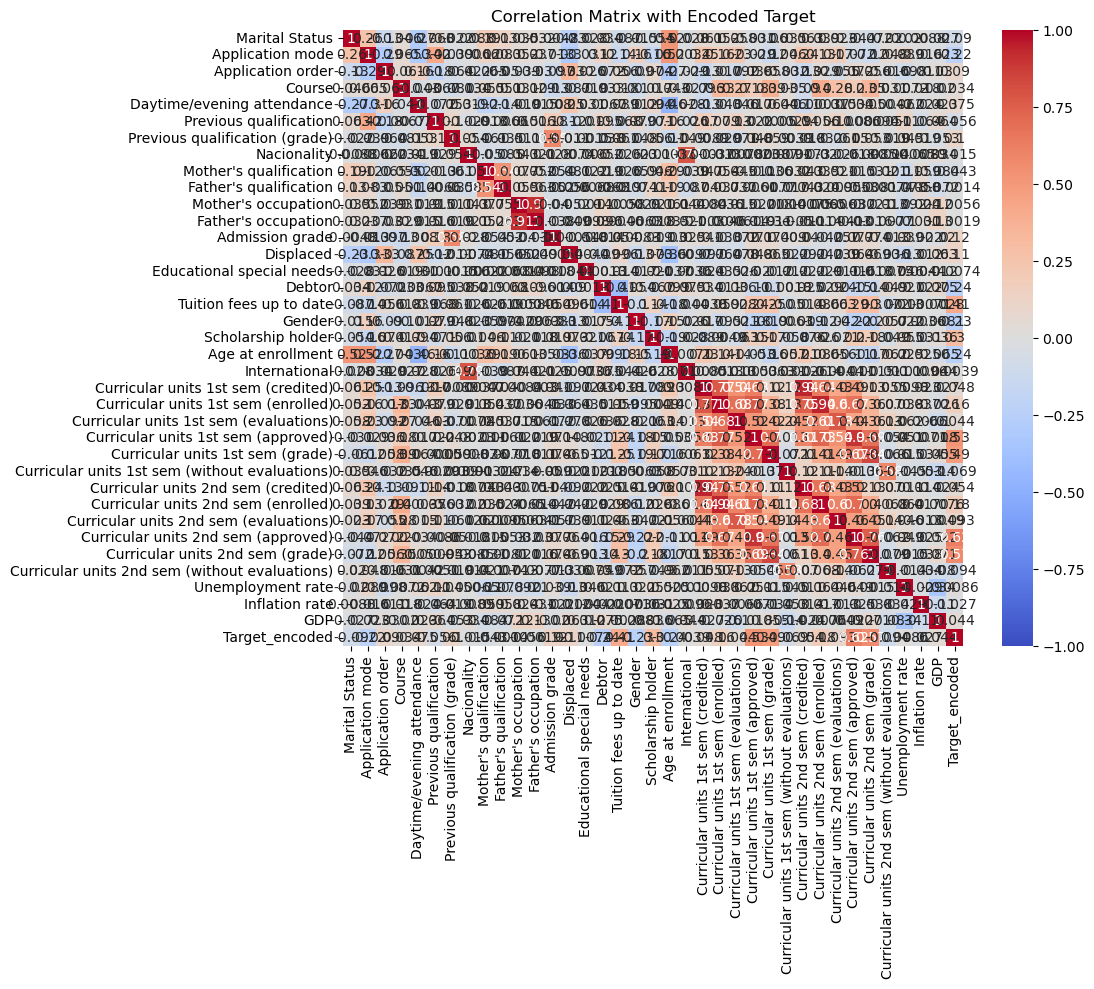

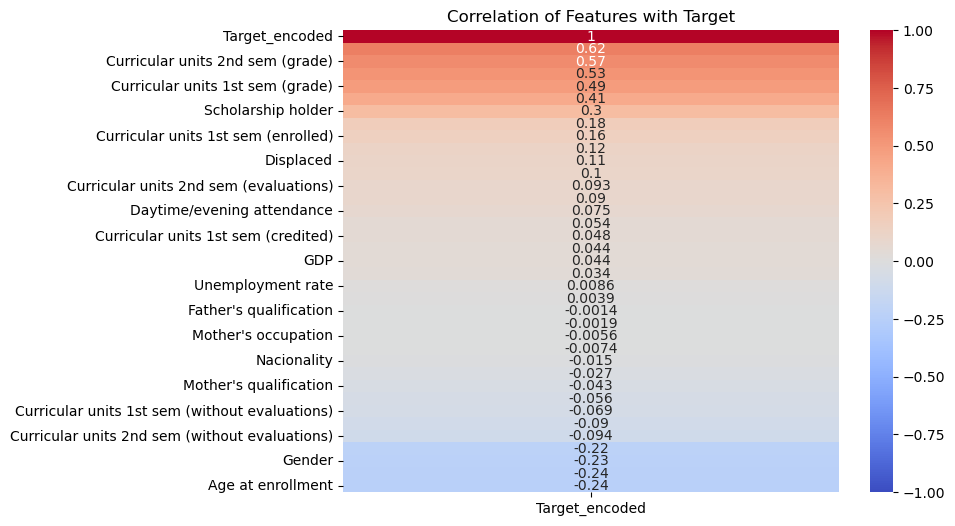